In [10]:
import torch
from torch import tensor, float32
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


### A hand-knitted Learner (included in Keras and fastai, not in Pytorch)

In [11]:
class Learner(object):
    def __init__(self, X, Y, G, optimizer, loss):
        self.X = X
        self.Y = Y
        self.G = G
        self.optimizer = optimizer
        self.loss = loss

    def fit(self):
        cnt = 0
        history = []

        while cnt < 101:
            currentLoss = self.loss(self.G(self.X), self.Y)
            if cnt % 10 == 0:
                history.append(currentLoss.item())
            currentLoss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            cnt += 1

        return history

    def result(self):
        return self.G(self.X)


### Regressor with mean square error loss

In [19]:
# X = Input (4 x 2)
# Y = Output  (4 x 1)

def prepare21(lr):
   
    X = tensor((0, 0, 0, 1, 1, 0, 1, 1), requires_grad=True, dtype=float32).reshape(4, 2)
    Y = tensor((0, 0, 0, 1), dtype=torch.float32).reshape(4, 1)
    M = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

    d = {'0.weight': torch.tensor([[1., 1.]]),
         '0.bias': torch.tensor([0.0])}
    M.load_state_dict(d)

    optimizer = optim.SGD(M.parameters(), lr=lr)
    loss = nn.MSELoss()

    return Learner(X, Y, M, optimizer, loss)

### Classifier with binary cross entropy loss

In [13]:
# X = Input (4 x 2)
# Y = Output  (4 x 1)

def prepare21a(lr):
   
    X = tensor((0, 0, 0, 1, 1, 0, 1, 1), requires_grad=True, dtype=float32).reshape(4, 2)
    Y = tensor((0, 0, 0, 1), dtype=torch.float32).reshape(4, 1)
    M = nn.Linear(2, 1)

    optimizer = optim.SGD(M.parameters(), lr=lr)
    loss = nn.BCEWithLogitsLoss()

    return Learner(X, Y, M, optimizer, loss)

### Classifier with cross entropy loss

In [14]:
# X = Input (4 x 2)
# Y = Output  (4)

def prepare22(lr):
    X = tensor((0, 0, 0, 1, 1, 0, 1, 1), requires_grad=True, dtype=float32).reshape(4, 2)
    Y = tensor((0, 0, 0, 1), dtype=torch.long).reshape(4)
    M = nn.Linear(2, 2)

    optimizer = optim.SGD(M.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()

    return Learner(X, Y, M, optimizer, loss)

In [15]:
def plot(history):
    plt.plot(history, label='training loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('loss')
    plt.xlabel('iterations')


tensor([[0.0074],
        [0.1535],
        [0.1535],
        [0.8146]], grad_fn=<SigmoidBackward>)

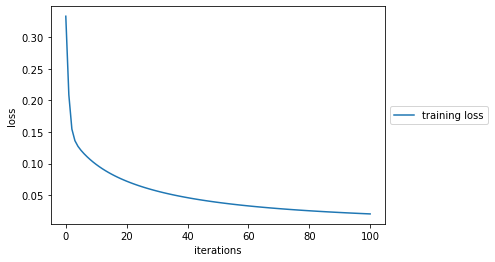

In [21]:
learn = prepare21(0.3)
history = learn.fit()
plot(history)
learn.result()

tensor([[-3.3879],
        [-1.2809],
        [-1.3286],
        [ 0.7783]], grad_fn=<AddmmBackward>)

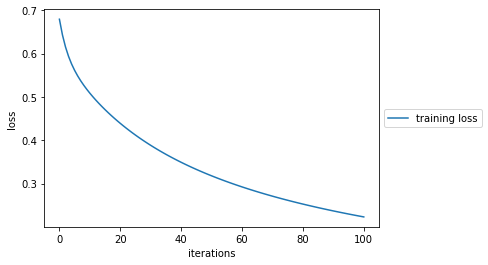

In [22]:
learn = prepare21a(0.05)
history = learn.fit()
plot(history)
learn.result()

tensor([[ 2.7760, -3.8471],
        [ 0.8328, -1.5026],
        [ 0.3783, -1.9568],
        [-1.5650,  0.3877]], grad_fn=<AddmmBackward>)

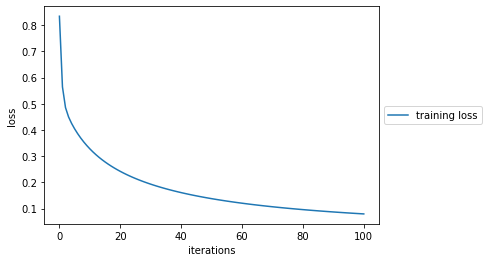

In [18]:
learn = prepare22(0.1)
history = learn.fit()
plot(history)
learn.result()